# Coronary Heart Disease (CHD) 

In [1]:
!python --version

Python 3.9.12


In [2]:
import numpy as np

In [3]:
CHD_coef = np.array([-7.7013, 0.0524, 0.6555, 0.0205, 0.6723, 0.2991])

## 男性

In [5]:
male = np.array([1, 65, 1, 145, 1, 0])
import math 
male_logit = np.dot(CHD_coef, male)
m_CHD_prob = math.exp(male_logit ) / (math.exp(male_logit ) + 1)
male_logit, m_CHD_prob

(0.0050000000000003375, 0.5012499973958399)

## women

In [6]:
female = np.array([1, 65, 0, 145, 1, 0])
female_logit = np.dot(CHD_coef, female)
f_CHD_prob = math.exp(female_logit ) / (math.exp(female_logit ) + 1)
female_logit, f_CHD_prob

(-0.6504999999999996, 0.3428768723163356)

In [7]:
(m_CHD_prob - f_CHD_prob) / f_CHD_prob

0.46189503540906773

### smokes

In [8]:
smoker = np.array([1, 65, 1, 145, 1, 1])
smoker_logit = np.dot(CHD_coef, smoker)
s_CHD_prob = math.exp(smoker_logit ) / (math.exp(smoker_logit ) + 1)
smoker_logit, s_CHD_prob

(0.3041000000000005, 0.5754444886698377)

In [9]:
(s_CHD_prob - m_CHD_prob) / m_CHD_prob

0.14801893597897817

# 4.2 Logistic regression

## 4.2.1 Estimating Probabilities 

In [10]:
import matplotlib.pyplot as plt

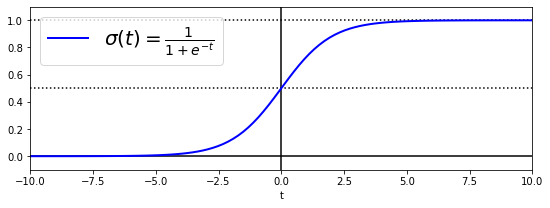

In [11]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
# plt.savefig("logistic_function_plot")
plt.show()

# 6.2 Cost Function and Training 

In [12]:
import math 
y = 1
p = 0.8
-y*math.log(p) - (1-y) *math.log( 1 - p)

0.2231435513142097

In [13]:
y = 1
p = 0.9
-y*math.log(p) - (1-y) *math.log( 1 - p)

0.10536051565782628

In [14]:
import numpy as np
np.arange(0.55, 0.96, 0.1)

array([0.55, 0.65, 0.75, 0.85, 0.95])

In [15]:
np.vstack((np.arange(0.55, 0.96, 0.1),-y* np.log(np.arange(0.55, 0.96, 0.1)) - (1-y) * np.log( 1 - np.arange(0.55, 0.96, 0.1))))

array([[0.55      , 0.65      , 0.75      , 0.85      , 0.95      ],
       [0.597837  , 0.43078292, 0.28768207, 0.16251893, 0.05129329]])

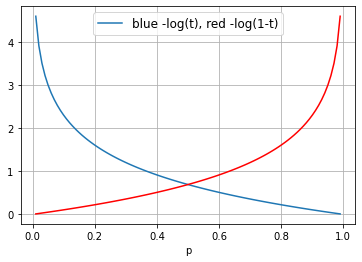

In [17]:
t = np.linspace(0.01, 0.99, 100)
positive_case = - np.log(t)
negative_case = - np.log(1 - t)
plt.plot(t, positive_case, 
         label="blue -log(t), red -log(1-t)")
plt.legend(loc="upper center", fontsize=12)
plt.plot(t, negative_case, "r-")
plt.grid()
plt.xlabel("p")
plt.savefig('lec06 log')
plt.show()

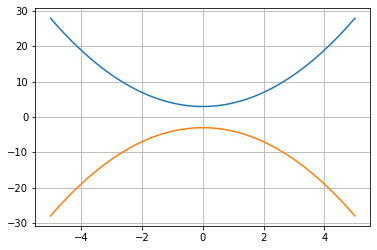

In [18]:
t = np.linspace(-5, 5, 100)
fx = t**2 + 3
inverse_fx = -t**2 - 3
plt.plot(t, fx, t, inverse_fx)
plt.grid()
plt.show()

### Cross Entropy 

example by prof. James F. Allen, http://www.cs.rochester.edu/u/james/CSC248/Lec6.pdf

In [19]:
import numpy as np
p = np.array([0.4, 0.1, 0.25, 0.25])
m1 = np.array([0.25, 0.25, 0.25, 0.25])
m2 = np.array([0.4, 0.1, 0.1, 0.4])

In [20]:
np.log2(m1) 

array([-2., -2., -2., -2.])

In [21]:
np.multiply(-p, np.log2(m1))

array([0.8, 0.2, 0.5, 0.5])

In [22]:
entropy_p = sum(np.multiply(-p, np.log2(p)))
entropy_p

1.860964047443681

In [23]:
sum(np.multiply(-p, np.log2(m2)))

2.021928094887362

In [24]:
sum(np.multiply(-p, np.log2(m1))) # m1 better than m2

2.0

In [25]:
Kullback_Leibler_divergence_m1 = sum(np.multiply(-p, np.log2(m1))) - entropy_p
Kullback_Leibler_divergence_m1

0.13903595255631895

# 4.3 Iris dataset

In [26]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [27]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## class 

* 0=Iris-Setosa, 
* 1=Iris-Versicolor, 
* 2=Iris-Virginica

In [28]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.amin.html#numpy.amin

In [29]:
np.amin(iris.data, axis=0)

array([4.3, 2. , 1. , 0.1])

In [30]:
np.amax(iris.data, axis=0)

array([7.9, 4.4, 6.9, 2.5])

In [31]:
iris.data.shape

(150, 4)

In [32]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
import pandas
from sklearn.datasets import load_iris
iris = load_iris()
iris1 = pandas.DataFrame(iris.data, columns=iris.feature_names) 
iris1["class"] =  iris.target
iris1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
iris1.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


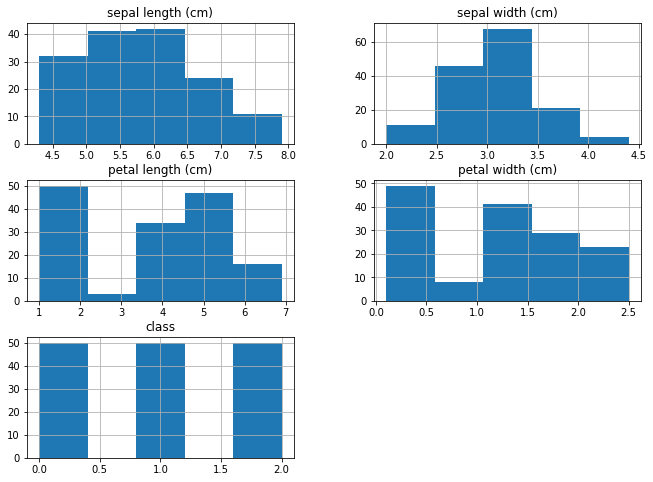

In [36]:
import matplotlib.pyplot as plt
iris1.hist(bins=5, figsize=(11,8))   # variable wine_data
plt.savefig("04_iris_histogram_plots") 
plt.show()

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='class', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='class', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubpl

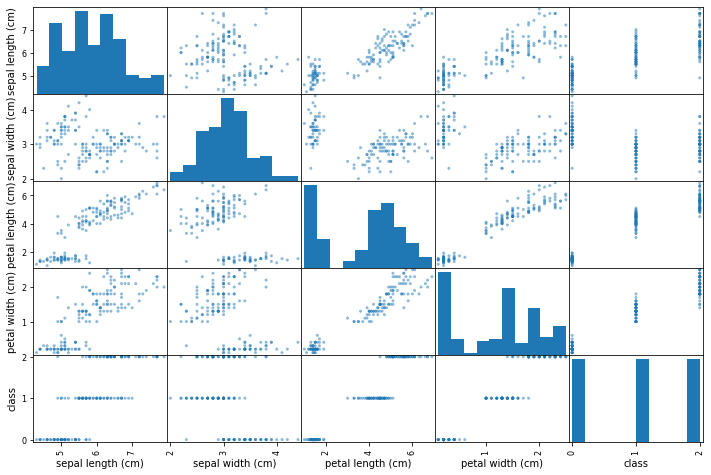

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris1, figsize=(12,8))

## Use one feature to classify

* https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.astype.html

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

C:\Users\Rizwan\AppData\Local\Temp\ipykernel_6636\2218681811.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


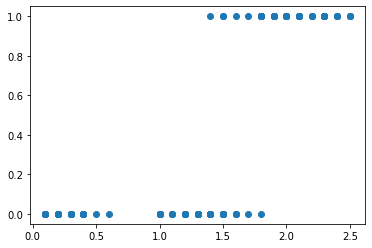

In [40]:
X = iris["data"][:, 3:]  # petal width 
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
plt.scatter(X,y)
plt.show()

In [42]:
y.shape

(150,)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)
print('Logistic regression training score: %.3f' % log_reg.score(X_train, Y_train))
print('Logistic regression testing score: %.3f' % log_reg.score(X_test, Y_test))

Logistic regression training score: 0.958
Logistic regression testing score: 0.967


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
#from sklearn.metrics import jaccard_similarity_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score 


In [59]:
accuracy_score(Y_test, log_reg.predict(X_test))

0.9666666666666667

In [60]:
log_reg.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0])

In [61]:
Y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
compare = Y_test - log_reg.predict(X_test)
compare = np.abs(compare)
compare

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

In [63]:
(Y_test.shape[0]  - compare.sum()) / Y_test.shape[0] 

0.9666666666666667

In [64]:
correct = 0
for i in range(Y_test.shape[0]):
    if log_reg.predict(X_test)[i] == Y_test[i]:
        correct += 1
correct/Y_test.shape[0] 

0.9666666666666667

## prediction by formula

$$ \frac{exp(\theta_0 + \theta_1 x)}{1+ exp(\theta_0 + \theta_1 x)} $$

In [65]:
log_reg.coef_[0][0], log_reg.intercept_[0]

(3.977743724622025, -6.484978265760308)

In [66]:
log_reg.decision_function(X_test[1].reshape(1,-1))

array([1.47050918])

In [67]:
log_reg.coef_[0][0]*X_test[1] + log_reg.intercept_[0]

array([1.47050918])

In [68]:
import math
math.exp(2)

7.38905609893065

Input and Output

* https://docs.python.org/3.6/tutorial/inputoutput.html

In [69]:
import math
for i in range(Y_test.shape[0]):
    a = math.exp(log_reg.intercept_[0] + log_reg.coef_[0][0] * X_test[i])
    print('x: {0}, Decision function: {1}, predicted probability: {2},  real class: {3}'\
          .format(X_test[i][0], log_reg.coef_[0][0]*X_test[i] + log_reg.intercept_[0], a/(1+a), Y_test[i], digits=4))

x: 1.4, Decision function: [-0.91613705], predicted probability: 0.285745650131732,  real class: 0
x: 2.0, Decision function: [1.47050918], predicted probability: 0.8131347670762684,  real class: 1
x: 1.4, Decision function: [-0.91613705], predicted probability: 0.285745650131732,  real class: 0
x: 1.0, Decision function: [-2.50723454], predicted probability: 0.07535256546902774,  real class: 0
x: 0.2, Decision function: [-5.68942952], predicted probability: 0.003370125355421832,  real class: 0
x: 1.0, Decision function: [-2.50723454], predicted probability: 0.07535256546902774,  real class: 0
x: 0.3, Decision function: [-5.29165515], predicted probability: 0.005008213845324663,  real class: 0
x: 1.2, Decision function: [-1.7116858], predicted probability: 0.15294518807893714,  real class: 0
x: 1.6, Decision function: [-0.12058831], predicted probability: 0.4698894024392777,  real class: 0
x: 0.2, Decision function: [-5.68942952], predicted probability: 0.003370125355421832,  real clas

In [70]:
import math
for i in range(Y_train.shape[0]):
    a = math.exp(log_reg.intercept_[0] + log_reg.coef_[0][0] * X_train[i])
    print('x: ', X_train[i][0], \
          'Decision function: ', log_reg.coef_[0][0]*X_train[i] + log_reg.intercept_[0], \
          'pred ', a/(1+a),\
          'real ', Y_train[i])

x:  1.6 Decision function:  [-0.12058831] pred  0.4698894024392777 real  1
x:  2.4 Decision function:  [3.06160667] pred  0.9552809830204658 real  1
x:  0.3 Decision function:  [-5.29165515] pred  0.005008213845324663 real  0
x:  1.8 Decision function:  [0.67496044] pred  0.6626129929894157 real  1
x:  1.3 Decision function:  [-1.31391142] pred  0.21183305746596107 real  0
x:  1.0 Decision function:  [-2.50723454] pred  0.07535256546902774 real  0
x:  0.6 Decision function:  [-4.09833203] pred  0.01632926972853795 real  0
x:  2.1 Decision function:  [1.86828356] pred  0.8662595456357008 real  1
x:  1.9 Decision function:  [1.07273481] pred  0.7451166532728755 real  1
x:  2.0 Decision function:  [1.47050918] pred  0.8131347670762684 real  1
x:  2.3 Decision function:  [2.6638323] pred  0.9348584358646265 real  1
x:  2.5 Decision function:  [3.45938105] pred  0.9695096753537501 real  1
x:  0.2 Decision function:  [-5.68942952] pred  0.003370125355421832 real  0
x:  0.2 Decision function:

In [71]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                   penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

* a small example

In [72]:
from sklearn.metrics import confusion_matrix
y_true = [0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
y_pred = [0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[4, 1],
       [2, 3]], dtype=int64)

In [74]:
from IPython.display import Image
Image(filename='04_confusion.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '04_confusion.jpg'

In [75]:
cm = confusion_matrix(y_true=Y_test, y_pred= log_reg.predict(X_test))
cm[::-1, ::-1]

array([[ 6,  0],
       [ 1, 23]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.93      0.98      0.95        30
weighted avg       0.97      0.97      0.97        30



In [77]:
classification_report(Y_test, log_reg.predict(X_test)) # as string

'              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98        24\n           1       0.86      1.00      0.92         6\n\n    accuracy                           0.97        30\n   macro avg       0.93      0.98      0.95        30\nweighted avg       0.97      0.97      0.97        30\n'

In [78]:
Y_test.sum() # total number of class 1 (Iris-Virginica)

6

In [79]:
precision_score(Y_test, log_reg.predict(X_test)), recall_score(Y_test, log_reg.predict(X_test))

(0.8571428571428571, 1.0)

## another data set

In [80]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)

cm = confusion_matrix(y_true=Y_test, y_pred= log_reg.predict(X_test))
print(cm[::-1, ::-1])
print('Logistic regression score: %.3f' % log_reg.score(X_test, Y_test))

[[ 8  1]
 [ 0 21]]
Logistic regression score: 0.967


C:\Users\Rizwan\AppData\Local\Temp\ipykernel_6636\2398139910.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


In [81]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)
print('Logistic regression score: %.3f' % log_reg.score(X_test, Y_test))


Logistic regression score: 0.967


C:\Users\Rizwan\AppData\Local\Temp\ipykernel_6636\1685941435.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


#### Graphical explanation

* https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html
* One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.

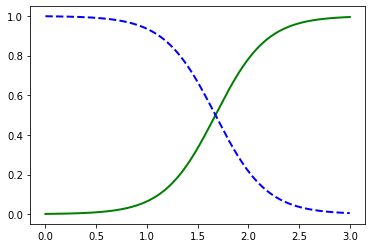

In [82]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

The figure in the book actually is actually a bit fancier: 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


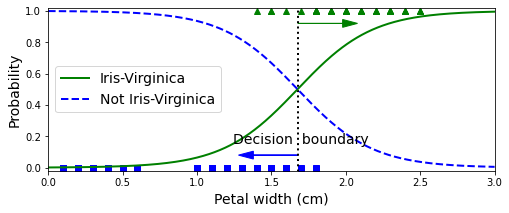

In [83]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.savefig("logistic_regression_plot")
plt.show()

In [84]:
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[0.99868862, 0.00131138],
       [0.99867295, 0.00132705],
       [0.9986571 , 0.0013429 ],
       ...,
       [0.00537668, 0.99462332],
       [0.00531346, 0.99468654],
       [0.00525098, 0.99474902]])

In [85]:
y_proba.shape

(1000, 2)

In [86]:
decision_boundary

array([1.67867868])

In [87]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# 4.3.2 Precision/Recall Tradeoff 

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

X = iris["data"][:, 3:]  # petal width 
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train) 
Y_scores = log_reg.decision_function(X_train)

precisions, recalls, thresholds = precision_recall_curve(Y_train, Y_scores)
precisions, recalls, thresholds 

C:\Users\Rizwan\AppData\Local\Temp\ipykernel_6636\2734682266.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


(array([0.68421053, 0.76      , 0.9       , 0.94594595, 0.97142857,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([1.        , 0.97435897, 0.92307692, 0.8974359 , 0.87179487,
        0.64102564, 0.51282051, 0.41025641, 0.28205128, 0.25641026,
        0.15384615, 0.07692308, 0.        ]),
 array([-1.00702772, -0.61553678, -0.22404585,  0.16744509,  0.55893603,
         0.95042696,  1.3419179 ,  1.73340883,  2.12489977,  2.51639071,
         2.90788164,  3.29937258]))

In [89]:
thresholds.min(), thresholds.max()

(-1.0070277191570414, 3.299372580022758)

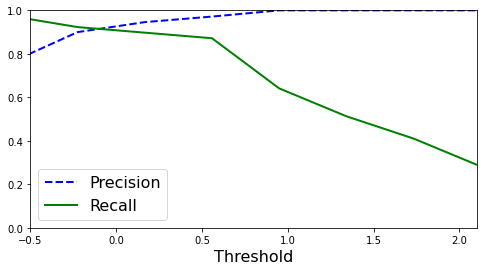

In [91]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-0.5, 2.1])
plt.savefig("06_precision_recall_vs_threshold_plot")
plt.show()

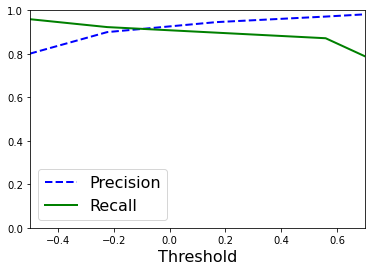

In [92]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.ylim([0, 1])


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-0.5, 0.7])
plt.savefig("04_precision_recall_vs_threshold_plot")
plt.show()

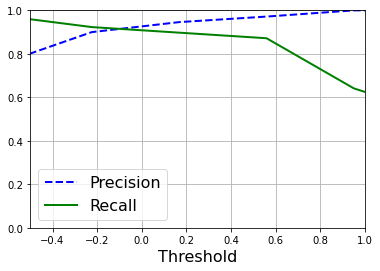

In [93]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.grid()
    plt.ylim([0, 1])

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-0.5, 1])
plt.savefig("04_precision_recall_vs_threshold_plot")
plt.show()

# 4.3.3 ROC curve

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X = iris["data"][:, 3:]  # petal width 
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=22)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train) 
print('Logistic regression score: %.3f' % log_reg.score(X_test, Y_test))
Y_scores = log_reg.decision_function(X_train)

Logistic regression score: 0.933


C:\Users\Rizwan\AppData\Local\Temp\ipykernel_6636\3005848185.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


In [95]:
# Compute ROC curve
Y_score = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
fpr.shape, tpr.shape, thresholds.shape

((14,), (14,), (14,))

In [96]:
# Compute ROC curve
Y_score = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

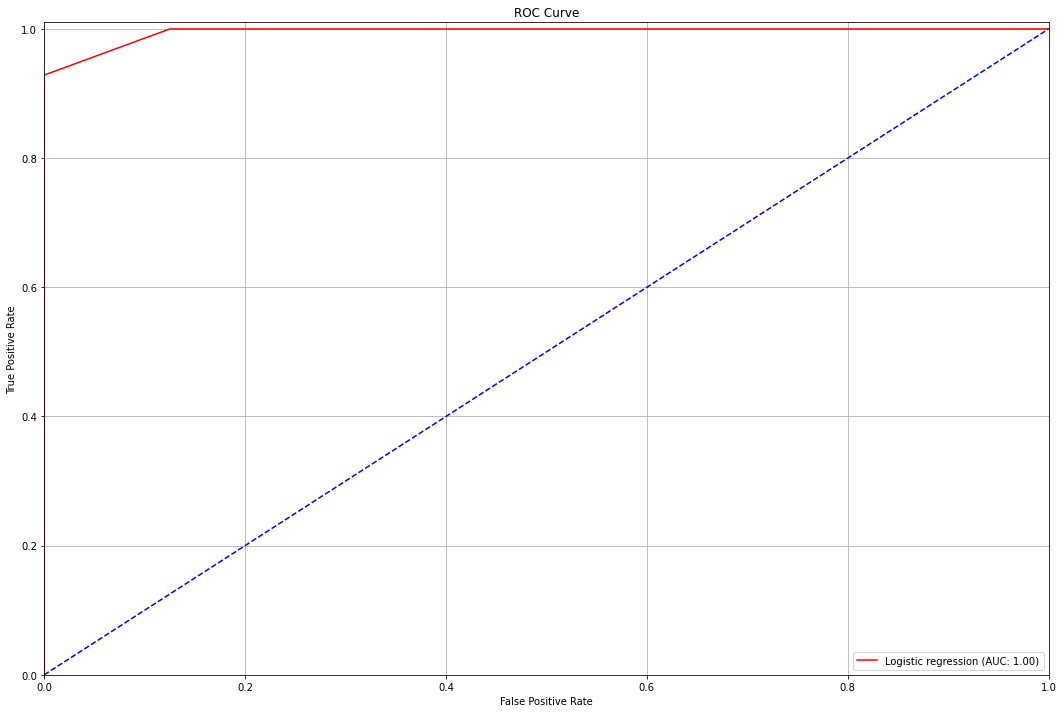

In [97]:
plt.figure(figsize=(18, 12))
plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("04_ROC_plot")
plt.grid()
plt.show()

In [98]:
auc(fpr, tpr)

0.9955357142857143

## 6.3.5 Python with 2 features 

* 2 features: petal width and length 

C:\Users\Rizwan\AppData\Local\Temp\ipykernel_6636\3968695621.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


[[11  1]
 [ 1 17]]
Logistic regression score: 0.933


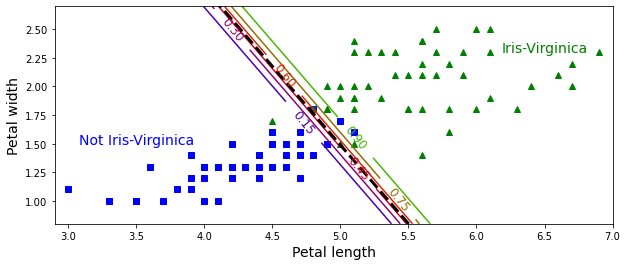

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris["data"][:, (2, 3)]  # petal width  and length 
y = (iris["target"] == 2).astype(np.int)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X_train, Y_train)

cm = confusion_matrix(y_true=Y_test, y_pred= log_reg.predict(X_test))
print(cm[::-1, ::-1])
print('Logistic regression score: %.3f' % log_reg.score(X_test, Y_test))
 

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

In [100]:
X.shape

(150, 2)

## 6.4 Softmax Regression

In [101]:
import numpy as np
import math 
s = np.array([0, 1, 2])
np.exp(s)/np.exp(s).sum()

array([0.09003057, 0.24472847, 0.66524096])

Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial"
to switch it to Softmax Regression instead. 

You must also specify a solver that supports
Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for more details). It also applies ℓ2 regularization by default, which you can
control using the hyperparameter C.

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris["data"][:, (2, 3)]  # petal width and length 
y = iris["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, Y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

C:\Users\Rizwan\AppData\Local\Temp\ipykernel_6636\1626310740.py:21: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)


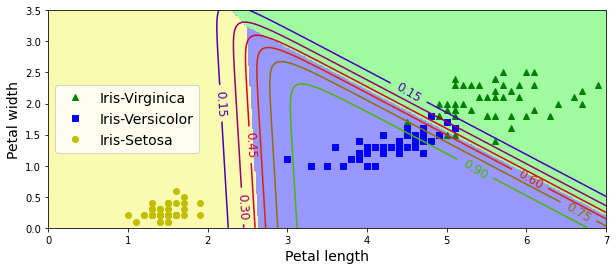

In [104]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.savefig("lec06 softmax_regression_contour_plot")
plt.show()

So the next time you find an iris with 5 cm long and 2 cm wide petals, you can ask
your model to tell you what type of iris it is, and it will answer Iris-Virginica (class 2)
with 94.2% probability (or Iris-Versicolor with 5.8% probability):

In [105]:
softmax_reg.predict([[5, 2]])

array([2])

In [106]:
softmax_reg.predict_proba([[5, 2]])

array([[9.56858586e-07, 6.91250086e-02, 9.30874035e-01]])

In [107]:
np.vstack((softmax_reg.predict(X_test), Y_test))

array([[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0],
       [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]])

In [108]:
cm = confusion_matrix(y_true = Y_test, y_pred = softmax_reg.predict(X_test))
print(cm[::-1, ::-1])
print('Logistic regression score: %.3f' % softmax_reg.score(X_test, Y_test))

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]
Logistic regression score: 1.000


In [109]:
import pandas as pd
pd.crosstab(Y_test, softmax_reg.predict(X_test),
            rownames=['label'], colnames=['predict'])

predict,0,1,2
label,,,
0,10,0,0
1,0,9,0
2,0,0,11


# another random state

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = iris["data"][:, (2, 3)]  # petal width and length 
y = iris["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state = 46)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state = 46)
softmax_reg.fit(X_train, Y_train)
print('Logistic regression score: %.3f' % softmax_reg.score(X_test, Y_test))
pd.crosstab(Y_test, softmax_reg.predict(X_test),
            rownames=['label'], colnames=['predict'])

Logistic regression score: 0.867


predict,0,1,2
label,,,
0,12,0,0
1,0,7,2
2,0,2,7


## cross-validation 

In [111]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, scoring='accuracy', cv = 10)
scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [112]:
scores.mean()

0.96

# 6.4.3 Grid Search 

In [113]:
import numpy as np
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, cross_val_score 

multiprocessing.cpu_count()

4

## Will produce 2 errors by using the following commands 

* lbfgs failed to converge (status=1)
* Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

It also provide the solutions in the error message!
* Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
* Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [114]:
import time
startTime = time.time() 

X = iris["data"] 
y = iris["target"]
# Define a param grid
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1e-5, 1e-4, 5e-4, 1e-3, 2.3e-3, 5e-3, 1e-2, 1, 5, 10, 15, 20, 100]  
    }
]

# Create and train a grid search
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, scoring ='accuracy', cv = 10)
   
gs.fit(X, y)

# Best estimator
print(gs.best_estimator_)

gs_scores = cross_val_score(gs.best_estimator_, X, y, scoring='accuracy', cv=10)
print('Best estimator CV average score: %.3f' % gs_scores.mean())

endTime = time.time() 
print('%s seconds to calculate.' % (endTime - startTime))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=10)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best estimator CV average score: 0.987
6.4464404582977295 seconds to calculate.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# New approach: 

* normalization first

In [116]:
import time
from sklearn import preprocessing
startTime = time.time() 

X = iris["data"] 
y = iris["target"]

# new 
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)


# Define a param grid
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1e-5, 1e-4, 5e-4, 1e-3, 2.3e-3, 5e-3, 1e-2, 1, 5, 10, 15, 20, 100]  
    }
]

# Create and train a grid search
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, scoring ='accuracy', cv = 10)
   
gs.fit(X, y)

# Best estimator
print(gs.best_estimator_)

gs_scores = cross_val_score(gs.best_estimator_, X, y, scoring='accuracy', cv=10)
print('Best estimator CV average score: %.3f' % gs_scores.mean())

endTime = time.time() 
print('%s seconds to calculate.' % (endTime - startTime))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
130 fits failed out of a total of 260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

LogisticRegression(C=100)
Best estimator CV average score: 0.980
1.353830099105835 seconds to calculate.


# New approach: 

* normalization and use the other solver 
    * infor 
        * https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
        * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [117]:
import time
from sklearn import preprocessing
startTime = time.time() 

X = iris["data"] 
y = iris["target"]

# new 
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)


# Define a param grid
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1e-5, 1e-4, 5e-4, 1e-3, 2.3e-3, 5e-3, 1e-2, 1, 5, 10, 15, 20, 100]  
    }
]

# Create and train a grid search
gs = GridSearchCV(estimator = LogisticRegression(solver='saga'), param_grid = param_grid, scoring ='accuracy', cv = 10)
   
gs.fit(X, y)

# Best estimator
print(gs.best_estimator_)

gs_scores = cross_val_score(gs.best_estimator_, X, y, scoring='accuracy', cv=10)
print('Best estimator CV average score: %.3f' % gs_scores.mean())

endTime = time.time() # 結束
print('%s seconds to calculate.' % (endTime - startTime))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

LogisticRegression(C=100, penalty='l1', solver='saga')
Best estimator CV average score: 0.980
1.0893189907073975 seconds to calculate.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

# The default max_iter=100. Changed to 5000

In [118]:
import time
from sklearn import preprocessing
startTime = time.time() 

X = iris["data"] 
y = iris["target"]

# new 
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)


# Define a param grid
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1e-5, 1e-4, 5e-4, 1e-3, 2.3e-3, 5e-3, 1e-2, 1, 5, 10, 15, 20, 100]  
    }
]

# Create and train a grid search
gs = GridSearchCV(estimator = LogisticRegression(solver='saga', max_iter=5000), param_grid = param_grid, scoring ='accuracy', cv = 10)
   
gs.fit(X, y)

# Best estimator
print(gs.best_estimator_)

gs_scores = cross_val_score(gs.best_estimator_, X, y, scoring='accuracy', cv=10)
print('Best estimator CV average score: %.3f' % gs_scores.mean())

endTime = time.time() # 結束
print('%s seconds to calculate.' % (endTime - startTime))

LogisticRegression(C=20, max_iter=5000, penalty='l1', solver='saga')
Best estimator CV average score: 0.980
3.5402908325195312 seconds to calculate.


# info

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [119]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver='saga', max_iter=5000, penalty= 'l1') # C : float, default: 1.0
scores = cross_val_score(lr, X, y, scoring='accuracy', cv = 10)
scores

array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [120]:
scores.mean()

0.9666666666666668

In [121]:
lr = LogisticRegression(solver='saga', max_iter=5000, penalty= 'l1', C = 10)
cross_val_score(lr, X, y, scoring='accuracy', cv = 10)

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [122]:
lr = LogisticRegression(solver='saga', max_iter=5000, penalty= 'l1', C = 10)
cross_val_score(lr, X, y, scoring='accuracy', cv = 10).mean()

0.9666666666666668